# Project
Analysing the Impact of Lockdowns and GDP on the Spread of COVID-19 Using Python and Jupyter Notebook: A Comparative Study Using Two Datasets 
Sameep Rastogi


# Task 1:
Data cleansing.
Please use the following cells to read the two data files, clean and integrate them. You can add/delete cells as many as required to the following cells.

In [278]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [279]:
covidData = pd.read_csv('Covid-data.csv')

In [280]:
df = covidData

In [281]:
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0.0,0.0,0.0,0.0,44648.71,25499881.0
1,Australia,2020-01-01,0.0,0.0,0.0,0.0,44648.71,25499881.0
2,Australia,2020-01-02,0.0,0.0,0.0,0.0,44648.71,25499881.0
3,Australia,2020-01-03,0.0,0.0,0.0,0.0,44648.71,25499881.0
4,Australia,2020-01-04,0.0,0.0,0.0,0.0,44648.71,25499881.0


In [282]:
df.dtypes

location           object
date               object
total_cases       float64
new_cases         float64
total_deaths      float64
new_deaths        float64
gdp_per_capita    float64
population        float64
dtype: object

In [283]:
df.date.unique() #Still HAVE TO FIX THE DATE

array(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
       '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
       '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
       '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16', '2020-01-17', '2020-01-18', '2020-19-01',
       '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
       '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-31-01',
       '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
       '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
       '2020-02-17', '2020-18-02', '2020-02-19', '2020-20-02',
       '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-

In [284]:
list(df.iterrows())

[(0,
  location            Australia
  date               2019-12-31
  total_cases                 0
  new_cases                   0
  total_deaths                0
  new_deaths                  0
  gdp_per_capita        44648.7
  population        2.54999e+07
  Name: 0, dtype: object),
 (1,
  location            Australia
  date               2020-01-01
  total_cases                 0
  new_cases                   0
  total_deaths                0
  new_deaths                  0
  gdp_per_capita        44648.7
  population        2.54999e+07
  Name: 1, dtype: object),
 (2,
  location            Australia
  date               2020-01-02
  total_cases                 0
  new_cases                   0
  total_deaths                0
  new_deaths                  0
  gdp_per_capita        44648.7
  population        2.54999e+07
  Name: 2, dtype: object),
 (3,
  location            Australia
  date               2020-01-03
  total_cases                 0
  new_cases                   0
  t

In [285]:
df.date
for idx, row in df.iterrows(): 
    
    tmp=row[1].split('-')
    if int(tmp[1])>12:
        df.loc[idx,'date'] = tmp[0] +'-'+tmp[2]+'-'+tmp[1]

In [286]:
df['date'].unique() #These values have been fixed and now are in the same format 

array(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
       '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
       '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
       '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
       '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
       '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
       '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
       '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
       '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-

In [287]:
df['total_cases'].unique()#found many float values which need to be converted to integers as cases can only be whole numbers

array([0.000000e+00, 1.000000e+00, 4.000000e+00, ..., 3.247684e+06,
       3.304942e+06, 3.363056e+06])

In [288]:
df['total_cases'] = df.total_cases.astype(int) #float values converted to int

In [289]:
df['total_cases'].dtypes

dtype('int64')

In [290]:
df['total_cases'].unique() #total cases has been cleaned 

array([      0,       1,       4, ..., 3247684, 3304942, 3363056])

In [291]:
df['new_cases'].unique() #uncleaned float values

array([ 0.0000e+00,  1.0000e+00,  3.0000e+00,  2.0000e+00,  4.0000e+00,
        8.0000e+00,  1.1000e+01,  7.0000e+00,  6.0000e+00,  2.0000e+01,
        1.2000e+01,  1.4000e+01,  3.0000e+01,  4.1000e+01,  5.2000e+01,
        4.9000e+01,  7.7000e+01,  7.9000e+01,  1.1100e+02,  1.4400e+02,
        1.6500e+02,  2.2400e+02,  6.1100e+02,  1.1400e+02,  6.0000e+02,
        3.7600e+02,  3.6700e+02,  2.1200e+02,  4.3100e+02,  2.8400e+02,
        4.6400e+02,  1.5000e+02,  2.6900e+02,  2.4800e+02,  3.2400e+02,
        1.3900e+02,  5.7000e+01,  1.0000e+02,  1.1200e+02,  9.6000e+01,
        8.6000e+01,  5.1000e+01,  3.3000e+01,  4.4000e+01,  5.0000e+01,
        4.2000e+01,  3.9000e+01,  3.6000e+01,  5.3000e+01,  2.6000e+01,
        1.3000e+01,  2.2000e+01,  1.6000e+01,  1.0000e+01,  5.0000e+00,
        1.8000e+01,  2.4000e+01,  2.1000e+01,  1.5000e+01,  1.7000e+01,
        9.0000e+00,  2.3000e+01,  2.7000e+01,  2.5000e+01,  2.9000e+01,
        3.7000e+01,  4.6000e+01,  4.5000e+01,  8.1000e+01,  6.70

In [292]:
df['new_cases'] = df.new_cases.astype(int) #convert float to int as new cases can only be whole numbers

In [293]:
df['new_cases'].unique()

array([     0,      1,      3,      2,      4,      8,     11,      7,
            6,     20,     12,     14,     30,     41,     52,     49,
           77,     79,    111,    144,    165,    224,    611,    114,
          600,    376,    367,    212,    431,    284,    464,    150,
          269,    248,    324,    139,     57,    100,    112,     96,
           86,     51,     33,     44,     50,     42,     39,     36,
           53,     26,     13,     22,     16,     10,      5,     18,
           24,     21,     15,     17,      9,     23,     27,     25,
           29,     37,     46,     45,     81,     67,    254,    107,
           87,    137,    169,    131,    173,    300,    194,    244,
          183,    136,     19,    151,    140,     97,    259,    441,
          665,    787,   1753,   1466,   1740,   1980,   2095,   2590,
         2812,   3237,   3872,   3727,   3160,   3418,   2607,   2974,
         2490,   2028,  15141,   4156,   2538,   2007,   2052,   1890,
      

In [294]:
df[df['new_cases'] <0]#checking for negative values

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
549,France,2020-06-03,151325,-766,28940.0,107.0,38605.671,65273512.0
960,Itly,2020-06-20,238011,-148,34561.0,47.0,35220.084,60461828.0
1095,Spain,2020-04-19,193252,-713,20453.0,410.0,34272.360,46754783.0
1131,Spain,2020-05-25,235400,-372,26834.0,-1918.0,34272.360,46754783.0
1323,United Kingdom,2020-05-21,248293,-525,35704.0,363.0,39753.244,67886004.0
1366,United Kingdom,2020-07-03,283757,-29726,43995.0,89.0,39753.244,67886004.0


In [295]:
df['new_cases'].replace({-766: 766}, inplace=True)  #converting negative values to positive                  

In [296]:
df['new_cases'].replace({-148: 148}, inplace=True)         

In [297]:
df['new_cases'].replace({-713: 713}, inplace=True)     

In [298]:
df['new_cases'].replace({-372: 372}, inplace=True)   

In [299]:
df['new_cases'].replace({-525: 525}, inplace=True)   

In [300]:
df['new_cases'].replace({-29726:29726}, inplace=True)   

In [301]:
df['new_cases'].unique() #new_cases has been cleaned

array([    0,     1,     3,     2,     4,     8,    11,     7,     6,
          20,    12,    14,    30,    41,    52,    49,    77,    79,
         111,   144,   165,   224,   611,   114,   600,   376,   367,
         212,   431,   284,   464,   150,   269,   248,   324,   139,
          57,   100,   112,    96,    86,    51,    33,    44,    50,
          42,    39,    36,    53,    26,    13,    22,    16,    10,
           5,    18,    24,    21,    15,    17,     9,    23,    27,
          25,    29,    37,    46,    45,    81,    67,   254,   107,
          87,   137,   169,   131,   173,   300,   194,   244,   183,
         136,    19,   151,   140,    97,   259,   441,   665,   787,
        1753,  1466,  1740,  1980,  2095,  2590,  2812,  3237,  3872,
        3727,  3160,  3418,  2607,  2974,  2490,  2028, 15141,  4156,
        2538,  2007,  2052,  1890,  1750,   394,   891,   826,   647,
         218,   515,   410,   439,   329,   428,   574,   205,   127,
         119,   117,

In [302]:
df['total_deaths'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00, 5.00000e+00,
       6.00000e+00, 7.00000e+00, 8.00000e+00, 1.10000e+01, 1.30000e+01,
       1.40000e+01, 1.60000e+01, 1.90000e+01, 2.00000e+01, 2.10000e+01,
       2.30000e+01, 3.00000e+01, 3.40000e+01, 3.60000e+01, 4.20000e+01,
       4.50000e+01, 5.00000e+01, 5.20000e+01, 5.40000e+01, 5.70000e+01,
       6.10000e+01, 6.30000e+01, 6.70000e+01, 6.90000e+01, 7.00000e+01,
       7.10000e+01, 7.40000e+01, 7.50000e+01, 7.90000e+01, 8.10000e+01,
       8.30000e+01, 8.40000e+01, 8.80000e+01, 9.00000e+01, 9.20000e+01,
       9.30000e+01, 9.50000e+01, 9.60000e+01, 9.70000e+01, 9.80000e+01,
       9.90000e+01, 1.00000e+02, 1.01000e+02, 1.02000e+02, 1.03000e+02,
       1.04000e+02, 1.06000e+02, 1.07000e+02, 1.08000e+02, 1.70000e+01,
       2.60000e+01, 4.10000e+01, 5.60000e+01, 1.32000e+02, 1.70000e+02,
       2.13000e+02, 2.59000e+02, 3.04000e+02, 3.61000e+02, 4.26000e+02,
       4.92000e+02, 5.64000e+02, 6.37000e+02, 7.23000e+02, 8.120

In [303]:
df['total_deaths'].dtype

dtype('float64')

In [304]:
df[df['total_deaths'].isnull()]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
250,China,2020-02-22,76369,826,NaN,109.0,15308.712,1.439324e+09
650,Iran,2020-02-28,245,106,NaN,7.0,19082.620,8.399295e+07
680,Iran,2020-03-29,35408,3076,NaN,139.0,19082.620,8.399295e+07
850,Italy,2020-03-02,1689,561,NaN,6.0,35220.084,6.046183e+07
1200,United Kingdom,2020-01-19,0,0,NaN,NaN,39753.244,6.788600e+07
1500,United States,2020-05-01,1069826,29917,NaN,NaN,54225.446,3.310026e+08


In [305]:
df.head(1505)

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0,0,0.0,0.0,44648.710,25499881.0
1,Australia,2020-01-01,0,0,0.0,0.0,44648.710,25499881.0
2,Australia,2020-01-02,0,0,0.0,0.0,44648.710,25499881.0
3,Australia,2020-01-03,0,0,0.0,0.0,44648.710,25499881.0
4,Australia,2020-01-04,0,0,0.0,0.0,44648.710,25499881.0
...,...,...,...,...,...,...,...,...
1500,United States,2020-05-01,1069826,29917,NaN,NaN,54225.446,331002647.0
1501,United States,2020-05-02,1103781,33955,65068.0,2062.0,54225.446,331002647.0
1502,United Stats,2020-05-03,1133069,29288,66385.0,1317.0,54225.446,331002647.0
1503,United States,2020-05-04,1158041,24972,67682.0,1297.0,54225.446,331002647.0


In [306]:
df.at[250, 'total_deaths'] = 2347 #2445-98 = 2347 

In [307]:
df.at[650, 'total_deaths'] = 26 #34 - 8 = 26 

In [308]:
df.at[680, 'total_deaths'] = 2517 #2640-123= 2517 

In [309]:
df.at[850, 'total_deaths'] = 35 #52-17 = 35

In [310]:
df.at[1200, 'total_deaths'] = 0

In [311]:
df.at[1500, 'total_deaths'] = 63006 #65068 - 2062 = 63006

In [312]:
df['total_deaths'].unique() #NaN values have been removed, now floats-> int

array([0.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00, 5.00000e+00,
       6.00000e+00, 7.00000e+00, 8.00000e+00, 1.10000e+01, 1.30000e+01,
       1.40000e+01, 1.60000e+01, 1.90000e+01, 2.00000e+01, 2.10000e+01,
       2.30000e+01, 3.00000e+01, 3.40000e+01, 3.60000e+01, 4.20000e+01,
       4.50000e+01, 5.00000e+01, 5.20000e+01, 5.40000e+01, 5.70000e+01,
       6.10000e+01, 6.30000e+01, 6.70000e+01, 6.90000e+01, 7.00000e+01,
       7.10000e+01, 7.40000e+01, 7.50000e+01, 7.90000e+01, 8.10000e+01,
       8.30000e+01, 8.40000e+01, 8.80000e+01, 9.00000e+01, 9.20000e+01,
       9.30000e+01, 9.50000e+01, 9.60000e+01, 9.70000e+01, 9.80000e+01,
       9.90000e+01, 1.00000e+02, 1.01000e+02, 1.02000e+02, 1.03000e+02,
       1.04000e+02, 1.06000e+02, 1.07000e+02, 1.08000e+02, 1.70000e+01,
       2.60000e+01, 4.10000e+01, 5.60000e+01, 1.32000e+02, 1.70000e+02,
       2.13000e+02, 2.59000e+02, 3.04000e+02, 3.61000e+02, 4.26000e+02,
       4.92000e+02, 5.64000e+02, 6.37000e+02, 7.23000e+02, 8.120

In [313]:
df['total_deaths'] = df.total_deaths.astype(int)

In [314]:
df['total_deaths'].dtype

dtype('int64')

In [315]:
df['total_deaths'].unique() #total deaths has been cleaned 

array([     0,      1,      2,      3,      5,      6,      7,      8,
           11,     13,     14,     16,     19,     20,     21,     23,
           30,     34,     36,     42,     45,     50,     52,     54,
           57,     61,     63,     67,     69,     70,     71,     74,
           75,     79,     81,     83,     84,     88,     90,     92,
           93,     95,     96,     97,     98,     99,    100,    101,
          102,    103,    104,    106,    107,    108,     17,     26,
           41,     56,    132,    170,    213,    259,    304,    361,
          426,    492,    564,    637,    723,    812,    909,   1017,
         1114,   1368,   1381,   1524,   1666,   1771,   1869,   2008,
         2120,   2238,   2347,   2445,   2595,   2665,   2717,   2746,
         2790,   2837,   2872,   2914,   2946,   2983,   3014,   3044,
         3072,   3099,   3122,   3139,   3161,   3172,   3179,   3194,
         3203,   3216,   3225,   3241,   3249,   3253,   3259,   3265,
      

In [316]:
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0,0,0,0.0,44648.71,25499881.0
1,Australia,2020-01-01,0,0,0,0.0,44648.71,25499881.0
2,Australia,2020-01-02,0,0,0,0.0,44648.71,25499881.0
3,Australia,2020-01-03,0,0,0,0.0,44648.71,25499881.0
4,Australia,2020-01-04,0,0,0,0.0,44648.71,25499881.0


In [317]:
df['new_deaths'].unique()

array([ 0.000e+00,  1.000e+00,  2.000e+00,  3.000e+00,  7.000e+00,
        4.000e+00,  6.000e+00,        nan,  1.100e+01,  9.000e+00,
        1.500e+01,  2.500e+01,  2.600e+01,  3.800e+01,  4.300e+01,
        4.600e+01,  4.500e+01,  5.700e+01,  6.500e+01,  6.600e+01,
        7.200e+01,  7.300e+01,  8.600e+01,  8.900e+01,  9.700e+01,
        1.080e+02,  2.540e+02,  1.300e+01,  1.430e+02,  1.420e+02,
        1.050e+02,  9.800e+01,  1.390e+02,  1.120e+02,  1.180e+02,
        1.090e+02,  1.500e+02,  7.000e+01,  5.200e+01,  2.900e+01,
        4.400e+01,  4.700e+01,  3.500e+01,  4.200e+01,  3.200e+01,
        3.700e+01,  3.100e+01,  3.000e+01,  2.800e+01,  2.700e+01,
        2.300e+01,  1.700e+01,  2.200e+01,  1.600e+01,  8.000e+00,
        5.000e+00,  1.000e+01,  1.290e+03,  1.800e+01,  1.200e+01,
        3.600e+01,  2.100e+01,  6.900e+01,  1.280e+02,  7.800e+01,
        1.860e+02,  2.400e+02,  2.310e+02,  3.650e+02,  2.990e+02,
        3.190e+02,  2.920e+02,  4.180e+02,  4.990e+02,  5.090e

In [318]:
df[df['new_deaths'].isnull()]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
100,Australia,2020-04-09,6052,96,50,NaN,44648.710,2.549988e+07
300,China,2020-04-12,83097,93,3343,NaN,15308.712,1.439324e+09
500,France,2020-04-15,103573,5497,15729,NaN,38605.671,6.527351e+07
700,Iran,2020-04-18,79494,1499,4958,NaN,19082.620,8.399295e+07
900,Italy,2020-04-21,181228,2256,24114,NaN,35220.084,6.046183e+07
1200,United Kingdom,2020-01-19,0,0,0,NaN,39753.244,6.788600e+07
1500,United States,2020-05-01,1069826,29917,63006,NaN,54225.446,3.310026e+08


In [319]:
df.head(255)

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0,0,0,0.0,44648.710,2.549988e+07
1,Australia,2020-01-01,0,0,0,0.0,44648.710,2.549988e+07
2,Australia,2020-01-02,0,0,0,0.0,44648.710,2.549988e+07
3,Australia,2020-01-03,0,0,0,0.0,44648.710,2.549988e+07
4,Australia,2020-01-04,0,0,0,0.0,44648.710,2.549988e+07
...,...,...,...,...,...,...,...,...
250,China,2020-02-22,76369,826,2347,109.0,15308.712,1.439324e+09
251,China,2020-02-23,77016,647,2445,98.0,15308.712,1.439324e+09
252,China,2020-02-24,77234,218,2595,150.0,15308.712,1.439324e+09
253,China,2020-02-25,77749,515,2665,70.0,15308.712,1.439324e+09


In [320]:
df.at[100, 'new_deaths'] = 2

In [321]:
df.at[300, 'new_deaths'] = 2

In [322]:
df.at[500, 'new_deaths'] = 1438

In [323]:
df.at[700, 'new_deaths'] = 73

In [324]:
df.at[900, 'new_deaths'] = 534

In [325]:
df.at[1200, 'new_deaths'] = 0

In [326]:
df.at[1500, 'new_deaths'] = 2062

In [327]:
df[df['new_deaths'] <0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
965,Italy,2020-06-25,239410,577,34644,-31.0,35220.084,60461828.0
1131,Spain,2020-05-25,235400,372,26834,-1918.0,34272.360,46754783.0


In [328]:
df.head(969)

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0,0,0,0.0,44648.710,25499881.0
1,Australia,2020-01-01,0,0,0,0.0,44648.710,25499881.0
2,Australia,2020-01-02,0,0,0,0.0,44648.710,25499881.0
3,Australia,2020-01-03,0,0,0,0.0,44648.710,25499881.0
4,Australia,2020-01-04,0,0,0,0.0,44648.710,25499881.0
...,...,...,...,...,...,...,...,...
964,Itly,2020-06-24,238833,113,34675,18.0,35220.084,60461828.0
965,Italy,2020-06-25,239410,577,34644,-31.0,35220.084,60461828.0
966,Italy,2020-06-26,239706,296,34678,34.0,35220.084,60461828.0
967,Italy,2020-06-27,239961,255,34708,30.0,35220.084,60461828.0


In [329]:
df.at[965, 'total_deaths'] = 34706

In [330]:
df.at[967, 'new_deaths'] = 2

In [331]:
df.at[966, 'total_deaths'] = 34706.0

In [332]:
df.at[965, 'new_deaths'] = 31

In [333]:
df['new_deaths'] = df.new_deaths.astype(int) #NaN values have been removed, now float-> int

In [334]:
df['new_deaths'].unique()#New deaths has been cleaned

array([    0,     1,     2,     3,     7,     4,     6,    11,     9,
          15,    25,    26,    38,    43,    46,    45,    57,    65,
          66,    72,    73,    86,    89,    97,   108,   254,    13,
         143,   142,   105,    98,   139,   112,   118,   109,   150,
          70,    52,    29,    44,    47,    35,    42,    32,    37,
          31,    30,    28,    27,    23,    17,    22,    16,     8,
           5,    10,  1290,    18,    12,    36,    21,    69,   128,
          78,   186,   240,   231,   365,   299,   319,   292,   418,
         499,   509,   471,  2004,  1053,   518,   833,  1417,   541,
        1341,   987,   635,   561,   574,  1438,   753,   761,   642,
         395,   547,   531,   544,   516,   389,   369,   242,   437,
         367,   427,   289,   218,   166,   135,   306,   330,   278,
         178,   243,    80,   263,   348,    83,   351,   130,    88,
          68,   125,   110,    74,   107,    81,    54,    87,    24,
         111,    14,

In [335]:
df.head(1133)

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0,0,0,0,44648.71,25499881.0
1,Australia,2020-01-01,0,0,0,0,44648.71,25499881.0
2,Australia,2020-01-02,0,0,0,0,44648.71,25499881.0
3,Australia,2020-01-03,0,0,0,0,44648.71,25499881.0
4,Australia,2020-01-04,0,0,0,0,44648.71,25499881.0
...,...,...,...,...,...,...,...,...
1128,Spain,2020-05-22,234824,1787,28628,688,34272.36,46754783.0
1129,Spain,2020-05-23,235290,466,28678,50,34272.36,46754783.0
1130,Spain,2020-05-24,235772,482,28752,74,34272.36,46754783.0
1131,Spain,2020-05-25,235400,372,26834,-1918,34272.36,46754783.0


In [336]:
df.at[1131, 'new_deaths'] = 0 #according to the spanish government, wrong data had been recorded and the total deaths was actually 26834 which resulted in a negative value for new deaths

In [337]:
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0,0,0,0,44648.71,25499881.0
1,Australia,2020-01-01,0,0,0,0,44648.71,25499881.0
2,Australia,2020-01-02,0,0,0,0,44648.71,25499881.0
3,Australia,2020-01-03,0,0,0,0,44648.71,25499881.0
4,Australia,2020-01-04,0,0,0,0,44648.71,25499881.0


In [338]:
df['gdp_per_capita'].unique()

array([44648.71 , 15308.712, 38605.671, 19082.62 , 35220.084, 34272.36 ,
       39753.244, 54225.446])

In [339]:
df[df['gdp_per_capita'].isnull()]#check for NaN values 

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population


In [340]:
df['population'].unique()

array([2.54998810e+07, 1.43932377e+09, 6.52735120e+07, 8.39929530e+07,
       6.04618280e+07, 4.67547830e+07, 6.78860040e+07, 3.31002647e+08])

In [341]:
df[df['population'].isnull()]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population


In [342]:
df['population'] = df.population.astype('int') #converted float to int

In [343]:
df['population'].unique()

array([  25499881, 1439323774,   65273512,   83992953,   60461828,
         46754783,   67886004,  331002647])

In [344]:
lockdownDates= pd.read_csv('CountryLockdowndates.csv')

In [345]:
lockdownDates.head()

,Country/Region,Province,Date,Type,Reference
0,Afghanistan,NaN,24/03/2020,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,08/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,24/03/2020,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


In [346]:
df[df['location'] == 'Australia'] 

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0,0,0,0,44648.71,25499881
1,Australia,2020-01-01,0,0,0,0,44648.71,25499881
2,Australia,2020-01-02,0,0,0,0,44648.71,25499881
3,Australia,2020-01-03,0,0,0,0,44648.71,25499881
4,Australia,2020-01-04,0,0,0,0,44648.71,25499881
...,...,...,...,...,...,...,...,...
191,Australia,2020-07-09,8886,131,106,0,44648.71,25499881
192,Australia,2020-07-10,9059,173,106,0,44648.71,25499881
193,Australia,2020-07-11,9359,300,106,0,44648.71,25499881
194,Australia,2020-07-12,9553,194,107,1,44648.71,25499881


In [347]:
df.loc[df.index[0:196], 'lockdown_date'] = "2020/3/24" #lockdown date for Australia

In [348]:
df.loc[df.index[197:394], 'lockdown_date'] = "2020/1/23" #lockdown date for China

In [349]:
df.loc[df.index[394:591], 'lockdown_date'] = "2020/3/16"#lockdown date for France

In [350]:
df.loc[df.index[591:788], 'lockdown_date'] = "2020/3/15"  #LOCKDOWN DATE FOR IRAN 

In [351]:
df.loc[df.index[788:985], 'lockdown_date'] = "2020/3/11" #LOCKDOWN DATE FOR ITALY

In [352]:
df.loc[df.index[985:1181], 'lockdown_date'] = "2020/3/14"#LOCKDOWN DATE FOR SPAIN

In [353]:
df.loc[df.index[1181:1378], 'lockdown_date'] = "2020/3/18"#LOCKDOWN DATE FOR UNITED KINGDOM

In [354]:
df.loc[df.index[1378:1575], 'lockdown_date'] = "2020/3/13"#LOCKDOWN DATE FOR UNITED STATES

In [355]:
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,Australia,2019-12-31,0,0,0,0,44648.71,25499881,2020/3/24
1,Australia,2020-01-01,0,0,0,0,44648.71,25499881,2020/3/24
2,Australia,2020-01-02,0,0,0,0,44648.71,25499881,2020/3/24
3,Australia,2020-01-03,0,0,0,0,44648.71,25499881,2020/3/24
4,Australia,2020-01-04,0,0,0,0,44648.71,25499881,2020/3/24



<h1 style="color:red;font-size:20px;">You need to export a data set which contains infomration of the cleaned cronavirus dataset as well as the lockdown date as the last step of task 1 in the following cell.</h1>  

Please use dataframename.to_csv('<student_ID>_Task1DataSet.csv', index=False) to export your cleansed and integrated dataset. If your student Id is 1234, you should export the file with the following code

In [356]:
df.to_csv('31093809_Task1DataSet.csv',index=False)

In [357]:
df.date = pd.to_datetime(df.date)
df.head(3)

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,Australia,2019-12-31,0,0,0,0,44648.71,25499881,2020/3/24
1,Australia,2020-01-01,0,0,0,0,44648.71,25499881,2020/3/24
2,Australia,2020-01-02,0,0,0,0,44648.71,25499881,2020/3/24


In [358]:
df['date'] = df['date'].dt.date

# Task 2: 

### Question 1.	
Create a line chart to show the trend of the daily number of new cases for each country and explore the result of visualisation (Create one line chart for each country).  

### Australia

Text(0, 0.5, 'new cases')

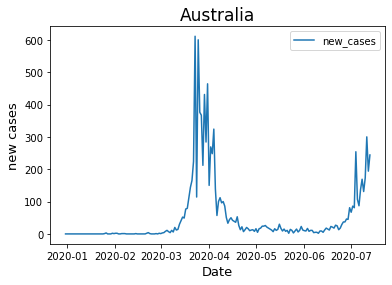

In [359]:
df.iloc[0:196].plot(x = 'date',y='new_cases')
plt.title('Australia', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Exploration : Australia
Upon plotting the line chart it can be observed that the number of new cases started rising in Australia around mid of March. The number of new cases reached the peak between end of March and beginning of April. Then there was a slow and steady decline towards end of April and beginning of May. The cases stayed relatively low after that period until July. There is a sudden rise in new cases in the month of July. The sudden rise is due to the second wave of new cases in the state of Victoria. The officials identified that the new surge in cases was due to a sudden spread of the virus in public housing towers. Due to the population density in the public housing towers, the virus spread rapidly. Another reason might be that as the number of new cases were steadily decreasing, this caused the residents of Victoria to be more relaxed about the restrictions. After the second wave, the number of cases continued to grow due mainly to community transmission.

links: https://www.news.com.au/world/coronavirus/health/victoria-coronavirus-how-the-virus-spread-through-public-housing/news-story/5a8a11f6807be8752ef111904ec94690
https://www.theguardian.com/world/2020/jun/29/victorias-coronavirus-spike-whats-causing-it-and-is-anyone-to-blame
https://www.abc.net.au/news/2020-07-10/coronavirus-cases-victoria-numbers/12444034
https://www.bloomberg.com/news/articles/2020-07-27/australia-s-victoria-reports-daily-record-532-new-virus-cases



### China

Text(0, 0.5, 'new cases')

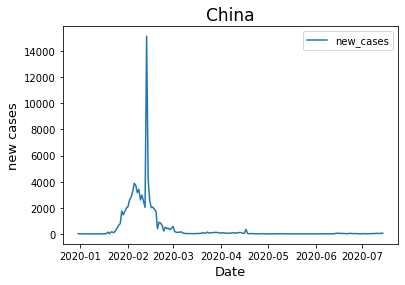

In [360]:
df.iloc[197:394].plot(x='date', y='new_cases') 
plt.title('China', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Exploration : China
It is observed that the number of new cases in China started rising around the end of January 2020. The number of new cases in China peaked between end of January to beginning of March. Then there was a sudden decline in new cases and  the trend for new cases has been constant since then. China had the peak of new cases before most countries as it was the origin of the virus and it spread in China before spreading internationally. There was a sudden decline in new cases in China because of the extraordinary lockdown efforts put by the government. The origin of the virus was Wuhan in the Hubei province of China. In order to control the spread of the virus, the whole province of Hubei (60 million people) went under an extremely strict lockdown. The main cause of the sudden decline is due to the aggressive measure taken by the government. Recently WHO reported that masks are very effective in controlling the virus, China and some other East Asian countries were amongst the first ones to make masks mandatory for the general population which is another reason for the effective control of the virus. 

links: https://www.wsj.com/articles/drop-in-new-coronavirus-cases-in-china-offers-hope-that-its-outbreak-is-ebbing-11582636045
https://www.wsj.com/articles/doctor-at-wuhan-hospital-dies-as-coronavirus-outbreak-spreads-11579944323?mod=article_inline
https://economictimes.indiatimes.com/news/international/world-news/steep-decline-in-coronavirus-cases-in-china-who-expert/articleshow/74289629.cms
https://www.telegraph.co.uk/news/2020/02/20/china-posts-steep-drop-virus-cases-changing-counts-infections/


### France

Text(0, 0.5, 'new cases')

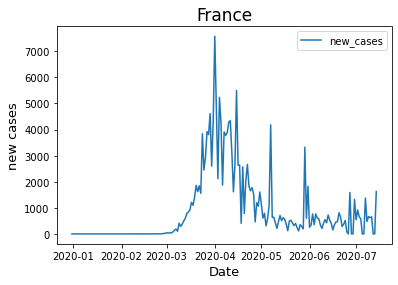

In [361]:
df.iloc[394:591].plot(x='date', y='new_cases')
plt.title('France', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Exploration : France
Looking at the line chart, it is observed that the number of new cases stared rising in France between end of March and have peaked at mid April. The number of cases eventually started declining between April to May but a large number of new cases was suddenly observed in June. After June the number of cases followed a general pattern of increase and decrease. The spread of the corona virus in European cities was mainly due to frequent inter-country travel inside Europe. France was put under lockdown in March but It took a while before the cases started decreasing. It took some time for the lockdown restrictions to take effect and people were eventually getting used to the restrictions. The spread of the virus also depends on the severity of lockdown restrictions. A steady decline in number of new cases was seen after the closure of EU and international borders in France. France chose to reopen borders to European countries on 15th June, which could explain why there was a sudden rise in new cases in the month of June. 

links: https://www.npr.org/sections/coronavirus-live-updates/2020/06/15/876953360/france-announces-further-reopening-amid-declining-number-of-coronavirus-cases
https://www.dailysabah.com/world/europe/france-records-13th-day-of-declining-coronavirus-cases
https://www.thenational.ae/world/europe/coronavirus-france-announces-near-total-lockdown-as-european-outbreak-worsens-1.993430
https://www.forbes.com/sites/alexledsom/2020/06/10/the-eu-reopens-its-borders-key-dates-for-traveling-to-france/#57bd8ce627e4


### Iran

Text(0, 0.5, 'new cases')

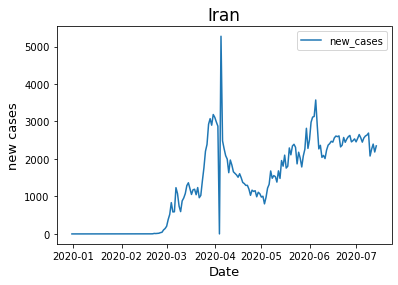

In [362]:
df.iloc[591:788].plot(x='date', y='new_cases')
plt.title('Iran', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Exploration : Iran
It is observed that the rise of new corona virus cases in Iran started in the month of March. There was a peak between end of March and beginning of May. Then were was a slight decline and another peak in new cases was observed between end of May to end of June. Since then the numbers of new cases has not declined much. In the first few months when Iran had surge of new cases, most cases were linked from international travel but then eventually there was community transmission in Iran. Iran went under a lockdown in mid of March and positive impacts of the lockdown were seen in the end of the next month. The number of new cases was steadily declining towards the end of April. Then suddenly there was a rise in new cases In the beginning of May. The government started easing lockdown restrictions when the number of new cases started declining. Public Parks reopened, interstate travel re-started and shopping malls also reopened on 20th April. The ease of restrictions lead to the sudden rise in new cases. The number of new cases continued to rise in May as the government opened restaurants, cafes and offices. A data found that the number of positive test results hit an all time high of 14% in Iran during late May mainly due to easing lockdown restrictions.
links:

https://www.bbc.com/news/52959756
https://www.theguardian.com/world/2020/jun/01/iran-rapid-rise-in-covid-19-cases-stokes-fears-of-second-wave
https://time.com/5804706/iran-coronavirus/


### Italy

Text(0, 0.5, 'new cases')

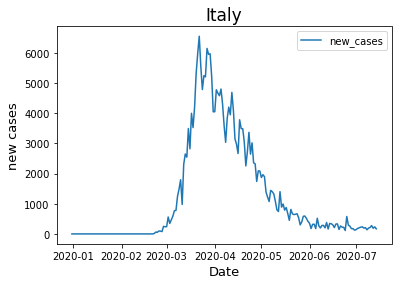

In [363]:
df.iloc[788:985].plot(x='date', y='new_cases')
plt.title('Italy', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Exploration : Italy
The increase in number of new cases in Italy started in late Feb. There was a sudden rise number of new cases in cases in March. The rise continued on until late May. There was a spike in the number of new cases everyday in March. The country went under lockdown during Mid March but the lockdown did not seem to be effective for a while. The government identified a ‘Super-Spreader’ of the virus that infected hundreds in the densely populated Northern region of Italy. The virus started to spread rapidly in the densely populated regions of Italy. The government increased the lockdown restrictions slowly and step by step to ensure that there is no panic amongst people or a sudden hit on the economy, but that lead to the spread of the virus even more. Italy’s approach was to lockdown few towns at a time and then eventually close the border from European countries. By the time, the government reached the last stage of lockdown, the number of new cases had surged which lead to the peak in March. Politicians said it is hard for the government to lockdown all regions of the country as it is a liberal democracy. The combined effort of the government, lockdown restrictions lead to the decline in number of new cases in Italy. When the government made masks mandatory for the residents, a steady decline was observed between April-May. All these factors add up to the steady decline in new cases. 

links: 
https://edition.cnn.com/2020/03/01/europe/italy-coronavirus-cases-travel-advisory/index.html
https://www.nytimes.com/2020/03/21/world/europe/italy-coronavirus-center-lessons.html
https://www.bbc.com/news/world-europe-51645902
https://www.cnbc.com/2020/03/02/coronavirus-next-seven-days-seen-as-decisive-for-italy.html
https://www.reuters.com/article/us-health-coronavirus-italy-tally/italys-daily-coronavirus-death-toll-and-new-cases-fall-idUSKBN22M0L2


### Spain

Text(0, 0.5, 'new cases')

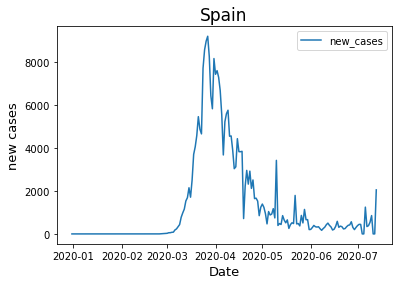

In [364]:
df.iloc[985:1181].plot(x='date', y='new_cases')
plt.title('Spain', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Exploration : Spain
The trend in the line chart for new cases in Italy and Spain is looks quite similar. This might be because both countries are popular holiday destinations of Europe.There was a surge in number of new cases in early March. The number of new cases kept rising till late April. Then there was a gradual decline. There was a spike in new cases between may and June but they were not major surges. The number of new cases stayed relatively low and there was a rise in July. The country went under a lockdown in mid March but the lockdown was not successful mainly because of political and cultural reasons. One of the reasons was that the population of Spain has a deeply embedded late-night and party culture. Reports have said that the residents took the pandemic casually until, they saw the sudden rise in the number of new cases and by that time, it was too late. The Spanish government did not stop large gatherings of people. For instance, over 120000 people gathered for celebrating International Woman’s day in Madrid on 8th of March,  Football matches and concerts continued to process in the capital, Madrid. As the number of new cases suddenly surged in Spain, the country went in a state of emergency. On 14th of March Spain officially went under lockdown. The cases had already spread exponentially throughout community by this time which is why the results of the lockdown were not seen until a month. 

links:https://www.nytimes.com/2020/04/07/world/europe/spain-coronavirus.html
https://www.vox.com/2020/3/20/21183315/coronavirus-spain-outbreak-cases-tests
https://www.bbc.com/news/world-europe-53551863
https://english.alarabiya.net/en/coronavirus/2020/04/17/Coronavirus-Spain-cases-rise-to-over-188-000



### United Kingdom

Text(0, 0.5, 'new cases')

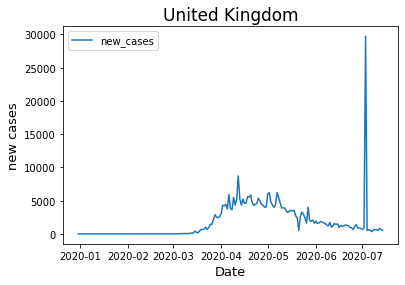

In [365]:
df.iloc[1181:1378].plot(x='date', y='new_cases')#Data for United Kingdom
plt.title('United Kingdom', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Exploration : United Kingdom
The spread of the virus started in the UK around late March. There was a surge of new cases in April. The number of new cases stayed constant until late May. According to the line chart, there is an exponential increases in the number of new cases but the increase only lasted a day, which means it could be an error in the data. According to the line chart on that day the UK recorded 30000 new cases, which has not occurred yet. The number of new cases has been declining since June. The country went under a lockdown in mid March. The positive impacts of the lockdown were noticed about a 2 months after the lockdown. The main reason being that different countries in the UK had different severity and timings of lockdown restrictions. Restaurants, gyms and pubs were still open in all countries in the UK until late march, which is what probably let to the surge in new cases. The Prime minister of UK ordered to close restaurants, shopping malls gyms and pubs in late march following the surge in cases. The lockdown along with closure of public gatherings eventually lead to a decline the number of new cases in the UK. 

links:
https://www.telegraph.co.uk/global-health/science-and-disease/coronavirus-news-uk-lockdown-cases-latest-deaths-schools-government/
https://www.independent.co.uk/news/uk/home-news/coronavirus-uk-timeline-deaths-cases-covid-19-nhs-social-distancing-a9416331.html
https://www.theguardian.com/world/2020/mar/05/more-than-a-hundred-people-in-uk-infected-with-coronavirus


### United States

Text(0, 0.5, 'new cases')

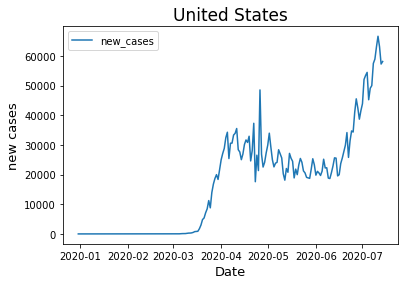

In [366]:
df.iloc[1378:1575].plot(x = 'date',y='new_cases')#Data for United States
plt.title('United States', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Exploration : United States
Observing from the line chart, it can be seen that there was a surge in new cases in the US at the end of March. The cases in the United States have continued to rise exponentially despite the government enforcing lockdown restrictions. One of the main reasons for the new cases not declining is the non compliant behavior of several residents. Several protests in major states in the US were held in order to oppose the lockdown restrictions enforced by the government. Anti-mask protests were also help in several states in the US which is another sign of non-compliance. Despite the government describing the situation as a state of Emergency, there were social gatherings and protests throughout the Country. A variety of events contributed to the surge in daily cases. New york city became an epicenter for the virus in the US and mostly young individuals were affected as they were more likely to go out. As New York city is very densely populated, the number of new cases increased exponentially. The first state to go under lockdown went under lockdown in early march, but many states started to enforced lockdown restrictions as late as may. Since the beginning of the pandemic and spread in the United States, a steady decline in number of new cases has not been observed. 

links:
https://www.wsj.com/articles/new-york-city-coronavirus-infection-rate-is-rising-among-younger-people-11594767458
https://www.nytimes.com/article/coronavirus-timeline.html
https://www.bbc.com/news/av/world-us-canada-52344540
https://www.forbes.com/sites/tommybeer/2020/07/16/anti-mask-rallies-continue-in-us-amid-rising-coronavirus-cases-and-deaths/#4907286c2246
https://en.wikipedia.org/wiki/Timeline_of_the_COVID-19_pandemic_in_the_United_States

### ***End of Question 1***

## Question 2
Add a vertical line for the lockdown date to the line chart of each country which you created in the previous question and explore if the lockdown affected the trend which is shown in the plot? Is the effect similar for all countries? Why do you think so?

Text(0, 0.5, 'new cases')

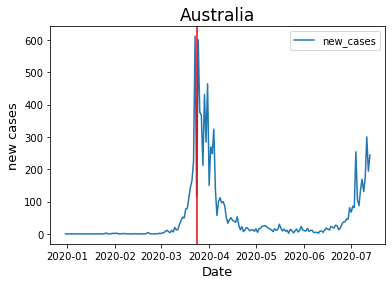

In [367]:
df.iloc[0:196].plot(x = 'date',y='new_cases')#Data for Australia
plt.axvline(x= '2020-3-24',color='r')
plt.title('Australia', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

Text(0, 0.5, 'new cases')

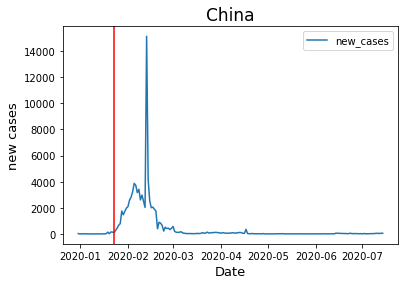

In [368]:
df.iloc[197:394].plot(x='date', y='new_cases') #Data for China
plt.axvline(x= '2020-1-23',color='r')
plt.title('China', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

Text(0, 0.5, 'new cases')

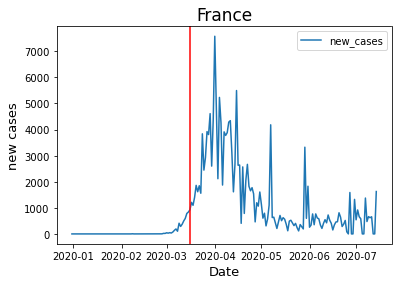

In [369]:
df.iloc[394:591].plot(x='date', y='new_cases')#Data for France
plt.axvline(x= '2020-3-16',color='r')  #2020/3/16
plt.title('France', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

Text(0, 0.5, 'new cases')

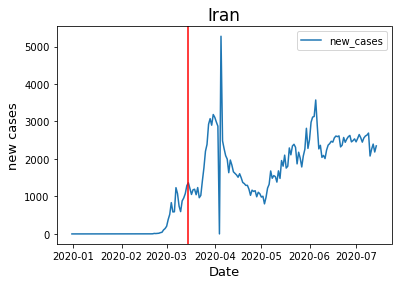

In [370]:
df.iloc[591:788].plot(x='date', y='new_cases')#Data for Iran
plt.axvline(x= '2020-3-15',color='r')
plt.title('Iran', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

Text(0, 0.5, 'new cases')

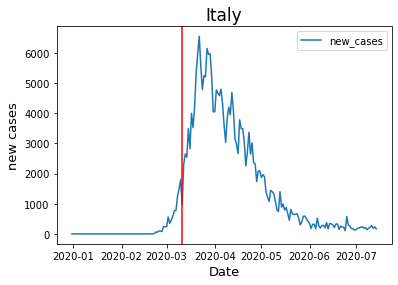

In [371]:
df.iloc[788:985].plot(x='date', y='new_cases')#Data for Italy
plt.axvline(x= '2020-3-11',color='r') #2020/3/11
plt.title('Italy', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

Text(0, 0.5, 'new cases')

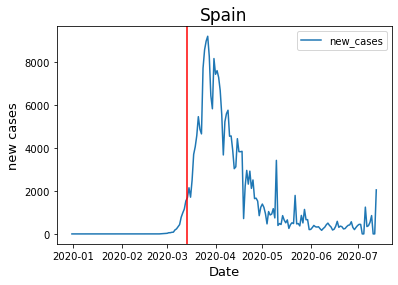

In [372]:
df.iloc[985:1181].plot(x='date', y='new_cases')#Data for Spain
plt.axvline(x= '2020-3-14', color = 'r')
plt.title('Spain', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

Text(0, 0.5, 'new cases')

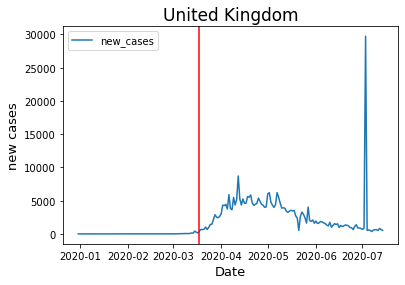

In [373]:
df.iloc[1181:1378].plot(x='date', y='new_cases')#Data for United Kingdom
plt.axvline(x= '2020-3-18', color = 'r')
plt.title('United Kingdom', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

Text(0, 0.5, 'new cases')

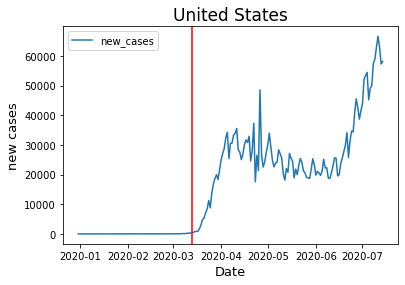

In [374]:
df.iloc[1378:1575].plot(x = 'date',y='new_cases')#Data for United States
plt.axvline(x= '2020-3-13', color = 'r')
plt.title('United States', color='black', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('new cases', fontsize=13)

### Explore if the lockdown affected the trend which is shown in the plot? Is the effect similar for all countries? Why do you think so?

##### Response:
Most countries have a similar trend. It appears as if the number of new_cases increases after the lockdown. This is an observation, however, it is not the cause of the increased cases. The cause of the increased cases could be that it took time for the lockdown to take effect and people did not follow the lockdown rules right after the lockdown and were getting used to it. Another reason could be that the lockdown dates in different states and territories were different. The lockdown date on the graph indicates the first state/territory/region in the country to have the lockdown. For instance in the case of the United States the first state went under lockdown on 13th of March and the last state went under lockdown as late as May. This could be the reason why the number of new cases does not seem to decrease in most countries. The trend is not the same for Australia. It can be observed by the line chart that new cases per day have steadily gone down after the lockdown date. The success of the lockdown is also related to the stage or severity of lockdown restrictions and how much the restrictions are enforced upon the residents.Initially the lockdown was successful for Australia due to the stage 4 lockdown enforced as soon as the cases started surging, later the state of Victoria had a second wave due to a variety of reasons mentioned in the first part of the question. The cultural and political background of countries also affect the success of the lockdowns enforced by the governments. It is harder for countries with more relaxed and non-compliant individuals to combat the pandemic as they are less likely to adhere to the restrictions enforced by the governments. In terms of the political background, it depends on the type of the government and how seriously the government acknowledges and works towards combating the pandemic and enforces restrictions. 


### ***End of Question 2***

### Question 3.  
Explore whether there is a relation between daily new case/death rate and the GDP of a country. To this aim, you need to calculate: 
*	The average of GDP of the countries, and then divide the countries into two groups, a group which its GDP is above the average GDP, and another group which its GDP is below the average GDP. We call the former group as "AboveGDP" and the later as "BelowGDP" from now onwards.
*	The daily new cases rate (new cases divided by population) for each country
*	The daily new death rate (new deaths divided by population) for each country 
        
Then, you need to create two line charts, one which shows the new case rate of groups "AboveGDP" and "BelowGDP"; and, another line chart to show the death rate of the two groups ("AboveGDP" and "BelowGDP").

    a) Which group ("AboveGDP" or "BelowGDP") usually had higher values of case rate?
    b) Which group ("AboveGDP" or "BelowGDP”) usually had higher values of the death rate?
    c) We would have expected that the case rate and death rate of group "AboveGDP" will be lower than group "BelowGDP". Does 
    the result of your visualisation is the same as the mentioned expectation? If no, why do you think the expectation is 
    different from the reality? 


In [375]:
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,Australia,2019-12-31,0,0,0,0,44648.71,25499881,2020/3/24
1,Australia,2020-01-01,0,0,0,0,44648.71,25499881,2020/3/24
2,Australia,2020-01-02,0,0,0,0,44648.71,25499881,2020/3/24
3,Australia,2020-01-03,0,0,0,0,44648.71,25499881,2020/3/24
4,Australia,2020-01-04,0,0,0,0,44648.71,25499881,2020/3/24


In [376]:
df[df['location']=='Spain']

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
985,Spain,2019-12-31,0,0,0,0,34272.36,46754783,2020/3/14
986,Spain,2020-01-01,0,0,0,0,34272.36,46754783,2020/3/14
987,Spain,2020-01-02,0,0,0,0,34272.36,46754783,2020/3/14
988,Spain,2020-01-03,0,0,0,0,34272.36,46754783,2020/3/14
989,Spain,2020-01-04,0,0,0,0,34272.36,46754783,2020/3/14
...,...,...,...,...,...,...,...,...,...
1176,Spain,2020-07-09,253056,543,28401,5,34272.36,46754783,2020/3/14
1177,Spain,2020-07-10,253908,852,28403,2,34272.36,46754783,2020/3/14
1178,Spain,2020-07-11,253908,0,28403,0,34272.36,46754783,2020/3/14
1179,Spain,2020-07-12,253908,0,28403,0,34272.36,46754783,2020/3/14


In [377]:
df.loc[df.index[0:196], 'new_cases'].mean() #example Australia

49.984693877551024

In [378]:
df.loc[df.index[1378:1575], 'new_cases'].mean()

17071.350253807108

New Case Rate

In [379]:
#new case rate Australia = 49.984693877551024/25499881 = 0.000001960193221

In [380]:
#new case rate China = 432.34517766497464/1439323774 = 0.000000300380766

In [381]:
#new case rate France = 882.7868020304569/65273512 = 0.00001352442629

In [382]:
#new case rate Iran = 1318.030456852792/83992953 = 0.00001569215523

In [383]:
#new case rate Italy = 1236.1725888324872/60461828 = 0.0000204455047

In [384]:
#new case rate Spain = 1316.954081632653/46754783 = 0.00002816725899

In [385]:
#new case rate United Kingdom = 1779.8730964467004/67886004 = 0.00002621855746

In [386]:
#new case rate United States = 17071.350253807108/331002647 = 0.00005157466385

In [387]:
df.loc[df.index[1181:1378], 'new_deaths'].mean()

227.56345177664974

New Death Rate

In [388]:
#new death rate Australia = 0.5357142857142857/25499881 = 0.000000021008501

In [389]:
#new death rate China = 23.573604060913706/1439323774 = 0.00000001637825

In [390]:
#new death rate France = 155.86294416243655/65273512 = 0.000002387843696

In [391]:
#new death rate Iran = 66.07106598984771/83992953 = 0.000000786626302

In [392]:
#new death rate Italy = 178.0761421319797/60461828 = 0.0000029452656

In [393]:
#new death rate Spain = 154.71428571428572/46754783 = 0.000003309057936

In [394]:
#new death rate United Kingdom = 228.72448979591837/67886004 = 0.000003369243678

In [395]:
#new death rate United States = 688.4619289340102/331002647 = 0.000002079928771

In [396]:
df["gdp_per_capita"].mean()

35140.15650730207

In [397]:
Task_3_data = {'Countries': ['Australia ', 'France' , 'Italy', 'UK', 'USA ', 'China ', 'Iran','Spain'],
                            'New_case_rate' :[0.000001960193221,0.00001352442629,0.0000204455047,0.00002621855746,0.00005157466385,0.000000300380766,0.00001569215523,0.00002816725899],
                            'New_death_rate':[0.000000021008501,0.000002387843696,0.0000029452656,0.000003369243678,0.000002079928771,0.00000001637825,0.000000786626302,0.000003309057936],
                            'GDP_per_capita': [44648.71,38605.671,35220.084,39753.244,54225.446,15308.712,19082.62,34272.36],
                            'AboveGDP': ['Australia', 'France', 'Italy', 'UK', 'USA','0', '0','0'],
                            'BelowGDP': ['China', 'Iran', 'Spain', '0', '0', '0', '0', '0',]}

In [398]:
df = pd.DataFrame(Task_3_data,columns=['Countries','New_case_rate','New_death_rate','GDP_per_capita','AboveGDP','BelowGDP'])

In [399]:
df['GDP_per_capita'].mean()

35139.605875

In [400]:
df.head(10)

,Countries,New_case_rate,New_death_rate,GDP_per_capita,AboveGDP,BelowGDP
0,Australia,1.960193e-06,2.100850e-08,44648.710,Australia,China
1,France,1.352443e-05,2.387844e-06,38605.671,France,Iran
2,Italy,2.044550e-05,2.945266e-06,35220.084,Italy,Spain
3,UK,2.621856e-05,3.369244e-06,39753.244,UK,0
4,USA,5.157466e-05,2.079929e-06,54225.446,USA,0
5,China,3.003808e-07,1.637825e-08,15308.712,0,0
6,Iran,1.569216e-05,7.866263e-07,19082.620,0,0
7,Spain,2.816726e-05,3.309058e-06,34272.360,0,0


### New case rate AboveGDP & BelowGDP Countries

Text(0, 0.5, 'new case rate')

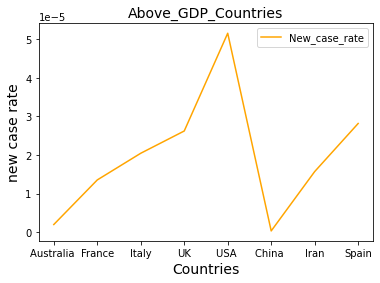

In [401]:
df.iloc[0:8].plot(x = 'Countries',y='New_case_rate', color = 'orange')
plt.title('Above_GDP_Countries', color='black', fontsize=14)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('new case rate', fontsize=14)

### New Death rate AboveGDP & BelowGDP Countries

Text(0, 0.5, 'new case rate')

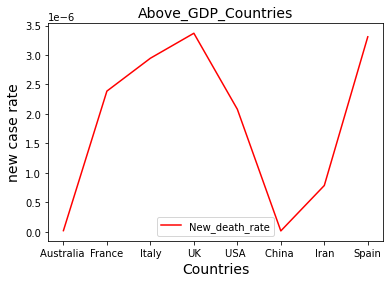

In [402]:
df.iloc[0:8].plot(x = 'Countries',y='New_death_rate', color='r')
plt.title('Above_GDP_Countries', color='black', fontsize=14)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('new case rate', fontsize=14)

### Sub-Questions:

### a)
In most cases the AboveGDP countries had higher level of new case rate.The line chart indicates that usually AboveGDP countries have higher new case rates. China being a BelowGDP country has the lowest new case rate. USA being an AboveGDP country has the highest new case rate. 

### b)
The AboveGDP group had higher levels of new death rate. UK, USA, France, Italy and Spain had very high death rates. Out of the  5 countries in the high death rate list, only Spain is a BelowGDP country. 

### c)
As anyone would expect that the AboveGDP countries on average would have lower cases and death rates compared to the BelowGDP countries, it is not true in this case. The result of the visualization is not the same as the expected result. There are a variety of factors that could have affected the death and new case rate. First of all the spread of the virus can only be controlled by precautions and rules being enforced. GDP in this case would not affect the level of compliance individuals have towards adhering to the lockdown restrictions in place. One reason could be that more older people live in AboveGDP countries because of the higher life expectancy and the corona virus death rate is higher amongst older individuals so these countries had higher death rates. Italy and UK which had amongst the highest death rates have one of the oldest populations living in Europe. In Italy 23% of its population is over 65 years old. Another reason for higher new cases and deaths in AboveGDP countries could be related to the international travel in and out the from the countries. AboveGDP countries on average have more international tourists, visitors and businessmen. As AboveGDP countries had more tourists/visitors the virus spread at a faster rate and the death rates is somewhat correlational to the number of cases. The probability of the death rate increases if more individuals are infected. 		


link:
https://www.forbes.com/sites/alexandrasternlicht/2020/03/25/countries-hit-hardest-with-coronavirus-have-older-populations/#33118ee14780 https://www.livescience.com/why-italy-coronavirus-deaths-so-high.html
https://www.theguardian.com/world/commentisfree/2020/mar/23/coronavirus-rich-countries-poor-west-covid-19-developing-world
https://www.abc.net.au/news/2020-05-21/why-do-rich-countries-have-such-high-coronavirus-death-rates/12264610




### End of Question 3